## Canadian Immigration from 1980 to 2013 - Exploratory Data Analysis (EDA)

### Introduction
Canada is globally  known to be one of the most Immigration-friendly countries. In this notebook, we would study Canada's immigration trend from 1980 to 2013. Being a Nigerian immigrant who migrated to Canada 12 years ago, I was interested in studying the trend of Canadian immigration. The dataset consists of immigrant records from over 150 countries between 1980 to 2013.

### Objective
To study the trends in Canadian Immigration between 1980 to 2013 and predict the immigration for 2014

### Questions
We hope to answer the following questions at the end of the analysis
 1. Which continent contributes highest to Canada's immigration?
 2. How does immigration compare with Developed and Developing countries?
 3. How many immigrants are predicted to migrate to Canada in 2014?

### Data Source

The dataset used in this project was obtained from Kaggle and can be accessed at https://www.kaggle.com/datasets/ammaraahmad/immigration-to-canada

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import piplite 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use(['ggplot'])
import warnings
warnings.filterwarnings("ignore")

### 
### Data Collection and Cleaning
The dataset will be read and loaded to a Pandas dataframe using the pandas 'read_csv' function. The head function can then be used to see the first 5 rows of the dataset

In [2]:
df = pd.read_csv('canadian_immigration_data.csv')

In [3]:
df.head() #To show the first 5 rows

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


###
The shape, column and info functions can also be used to get more information about the dataset

In [99]:
df.shape #To show number of rows and columns

(195, 39)

In [100]:
df.columns #To show column names

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

In [101]:
df.info

<bound method DataFrame.info of             Country Continent              Region             DevName  1980  \
0       Afghanistan      Asia       Southern Asia  Developing regions    16   
1           Albania    Europe     Southern Europe   Developed regions     1   
2           Algeria    Africa     Northern Africa  Developing regions    80   
3    American Samoa   Oceania           Polynesia  Developing regions     0   
4           Andorra    Europe     Southern Europe   Developed regions     0   
..              ...       ...                 ...                 ...   ...   
190        Viet Nam      Asia  South-Eastern Asia  Developing regions  1191   
191  Western Sahara    Africa     Northern Africa  Developing regions     0   
192           Yemen      Asia        Western Asia  Developing regions     1   
193          Zambia    Africa      Eastern Africa  Developing regions    11   
194        Zimbabwe    Africa      Eastern Africa  Developing regions    72   

     1981  1982  19

### 
### Checking for missing values
Using the null function to check for missing values in the dataset.

In [102]:
df.isnull().sum() #To check for missing values

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

###
Afghanistan, the first country in the dataset is indexed at 0. This might pose a problem for our analysis because we have a total of 195 countries. The default indexing give the data a range of 0 to 194. This issue can be fixed by setting the 'Country' column as the index.

In [4]:
df.set_index('Country',inplace=True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


###
The columns labeled '1980' to '2021' could be confused with the actual data. Using the 'map' function, the columns will be converted to strings to make the analysis easier

In [5]:
df.columns = list(map(str,df.columns))

###
After converting these values to strings, we can choose a name that would be used to identify them much easily. 'Years' sounds like a good name. This would serve as our dataframe to store the years 1980 to 2021.

In [6]:
Years = list(map(str, range(1980,2013)))
Years 

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012']

### 
### Data Analysis

**1. How many immigrants migrated to Canada between 1980 to 2013?**

In [7]:
tot_imm = df.sum()['Total'] 
print(f"Number of immigrants between 1980 to 2021 is {tot_imm}")

Number of immigrants between 1980 to 2021 is 6409153


###
**2. Total immigrants that migrated to Canada in 1980**

In [8]:
df.sum()['1980']
print(f"Number of immigrants in 1980 is {df.sum()['1980']}")

Number of immigrants in 1980 is 99137


###
**3. Top five countries with the highest number of migrants between 1980 to 2013**

In [9]:
df.nlargest(5,['Total'])

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


###
**4. Which country had the lowest number of immigrants between 1980 to 2013?**

In [10]:
df.nsmallest(1,['Total'])

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### 
### Immigrants by Continent
To find number of immigrants by continent, the easiest way to query the categorical data would be to use a boolean to identify the individual countries. For example, the boolean assigns 1 to a country if it is in Africa, and 0 if it is not. 

We can create a dataframe called 'is_Africa' to store the values if the country is in the African continent. The sum function can then be used to find the total number of African immigrants from the new dataframe. This can be done for the other continents to give the same result.

#### 
**1. Total Immigrants from Africa between 1980 to 2013**

In [26]:
is_Africa = df['Continent'] == 'Africa'
df[is_Africa].sum()

Continent    AfricaAfricaAfricaAfricaAfricaAfricaAfricaAfri...
Region       Northern AfricaMiddle AfricaWestern AfricaSout...
DevName      Developing regionsDeveloping regionsDeveloping...
1980                                                      3951
1981                                                      4363
1982                                                      3819
1983                                                      2671
1984                                                      2639
1985                                                      2650
1986                                                      3782
1987                                                      7494
1988                                                      7552
1989                                                      9894
1990                                                     11012
1991                                                     14228
1992                                                   

618,948 Africans migrated to Canada between 1980 to 2013.

### 
**2. Total Immigrants from Asia between 1980 to 2013**

In [13]:
is_Asia = df['Continent'] == 'Asia'
df[is_Asia].sum()

Continent    AsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAs...
Region       Southern AsiaWestern AsiaWestern AsiaWestern A...
DevName      Developing regionsDeveloping regionsDeveloping...
1980                                                     31025
1981                                                     34314
1982                                                     30214
1983                                                     24696
1984                                                     27274
1985                                                     23850
1986                                                     28739
1987                                                     43203
1988                                                     47454
1989                                                     60256
1990                                                     72829
1991                                                     89964
1992                                                   

3,317,794 Asians migrated to Canada between 1980 to 2013

###
### Data Visualization
**1. Pie chart of immigrants by continent**

The countries can be grouped by continent and the sum function used for the total number of immigrants

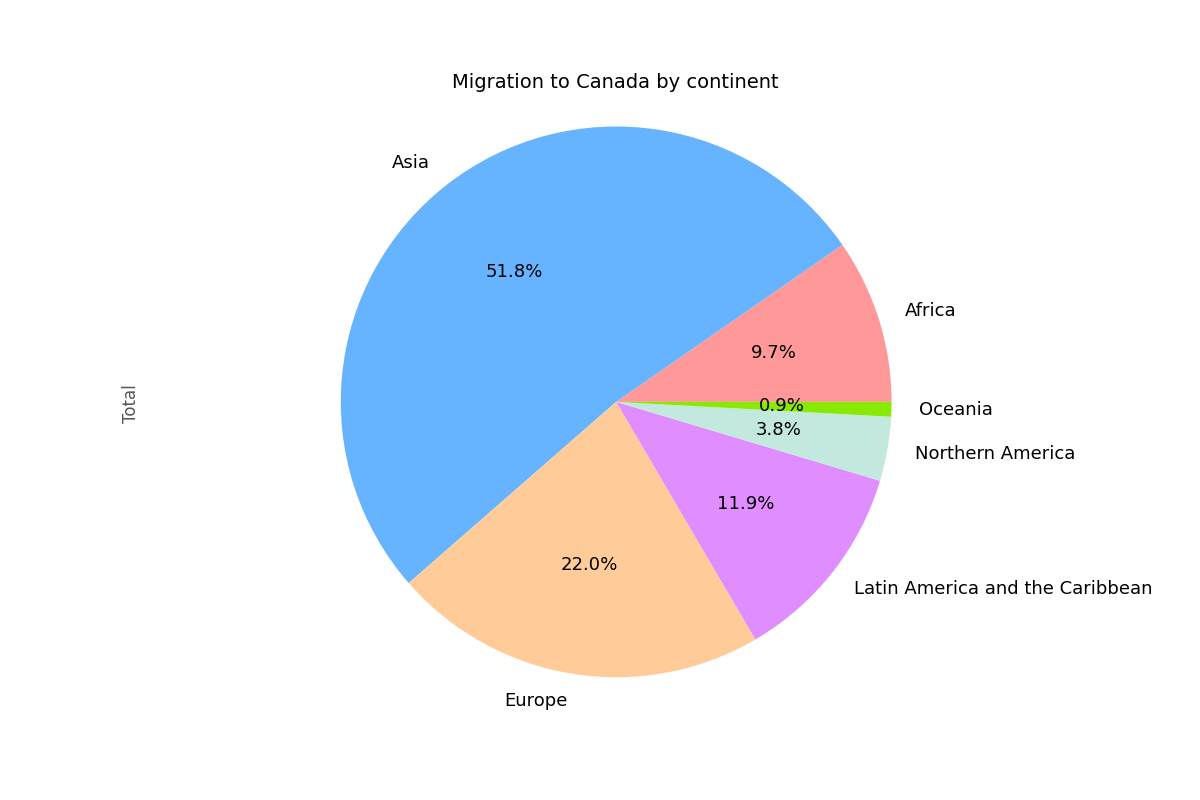

<Figure size 1200x800 with 0 Axes>

In [51]:
df_continent = df.groupby('Continent', axis = 0).sum()
colors = ['#ff9999','#66b3ff','#ffcc99','#e08dff','#c3e8de','#88e904']
df_continent['Total'].plot(kind = 'pie', figsize=(12,8), shadow=False, colors=colors, autopct='%1.1f%%', fontsize=13) 
plt.title('Migration to Canada by continent', fontsize=14)
plt.axis('equal')
plt.show()

###
**2. Pie chart of developing versus developed regions**

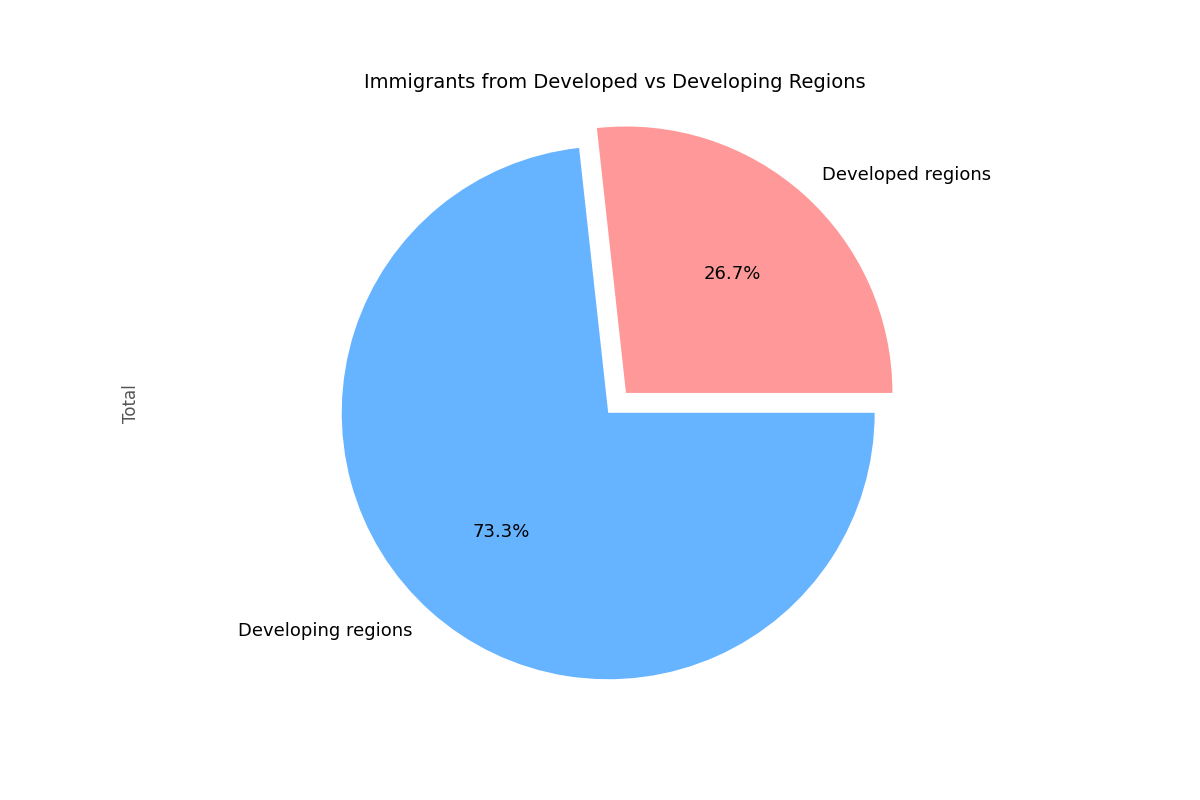

<Figure size 1200x800 with 0 Axes>

In [52]:
df_dev = df.groupby('DevName', axis = 0).sum()
colors = ['#ff9999','#66b3ff']
explode = (0,0.1) #explode to isolate on section of the pie chart
df_dev['Total'].plot(kind = 'pie', figsize=(12,8), shadow=False, autopct='%1.1f%%', explode=explode, colors=colors, fontsize=13)
plt.title('Immigrants from Developed vs Developing Regions', fontsize=14) 
plt.axis('equal')
plt.show()

###
**3. Bar Plot of the Top 15 countries contributing to Canadian Immigration in ascending order**

The sort function would be needed to create the list of the countries in ascending order to be used in the plot 

In [30]:
df.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df['Total'].tail(15) #Dataframe to store the top 15 values

In [31]:
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

####
Now that the list is sorted, the bar graph can be created for the top 15 countries

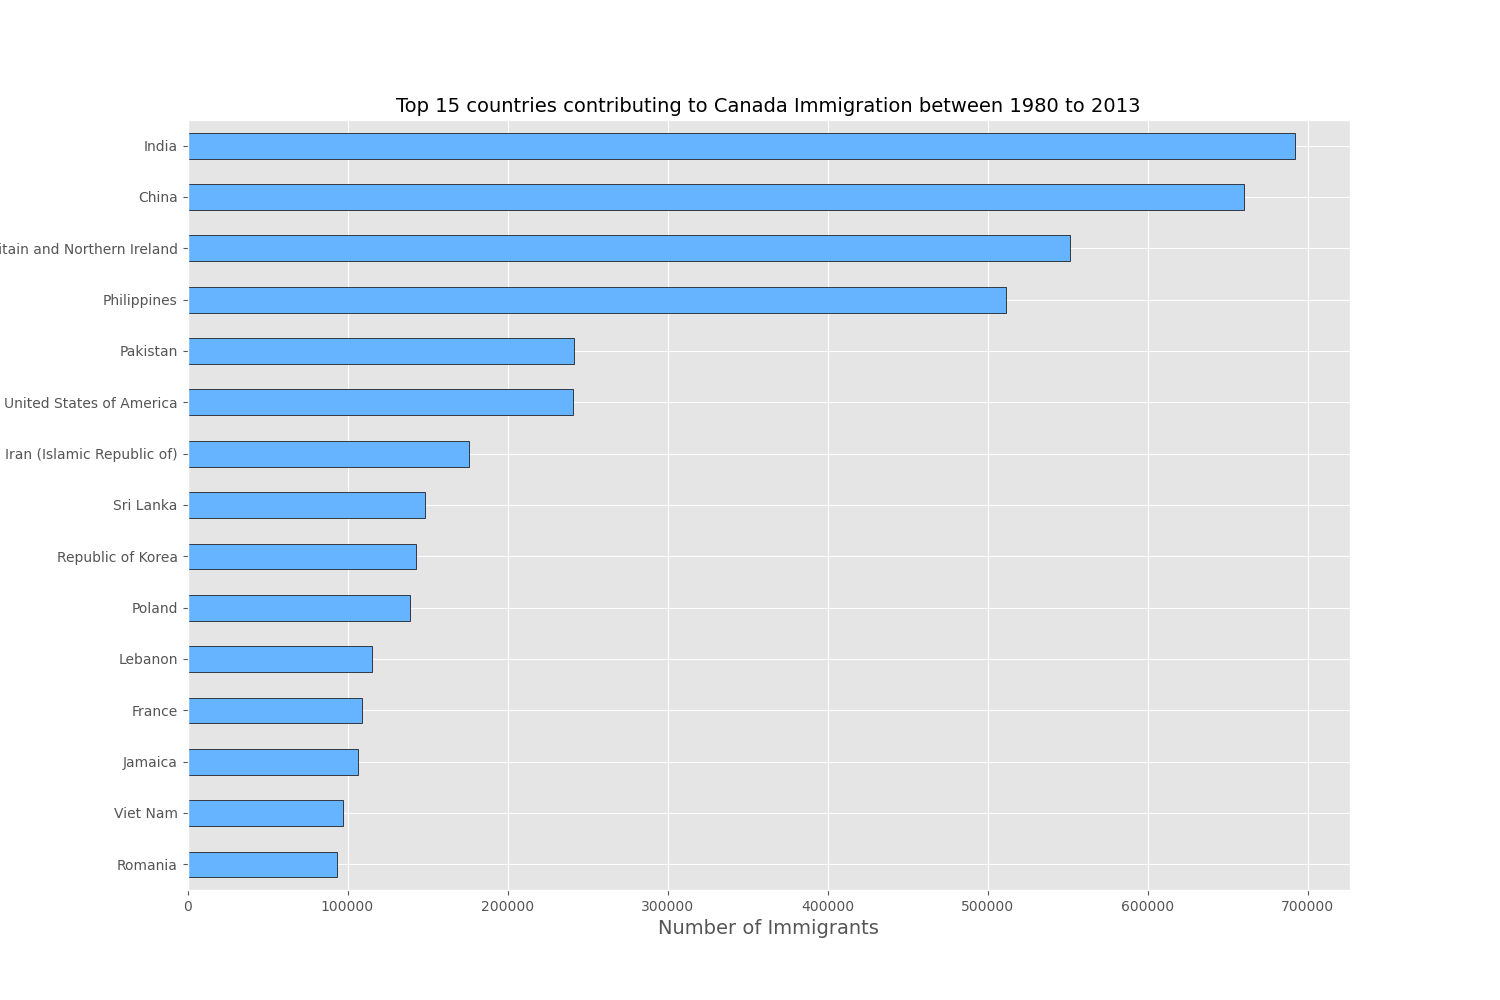

<Figure size 1500x1000 with 0 Axes>

In [61]:
df_top15.plot(kind='barh', figsize=(15, 10), color='#66b3ff', edgecolor='black',fontsize=10)
plt.xlabel('Number of Immigrants', fontsize=14)
plt.title('Top 15 countries contributing to Canada Immigration between 1980 to 2013', fontsize=14)
plt.show()

###
**5. Bar Plot of Nigerian immigrants Contributing to Canada Immigration from 1980 - 2013**

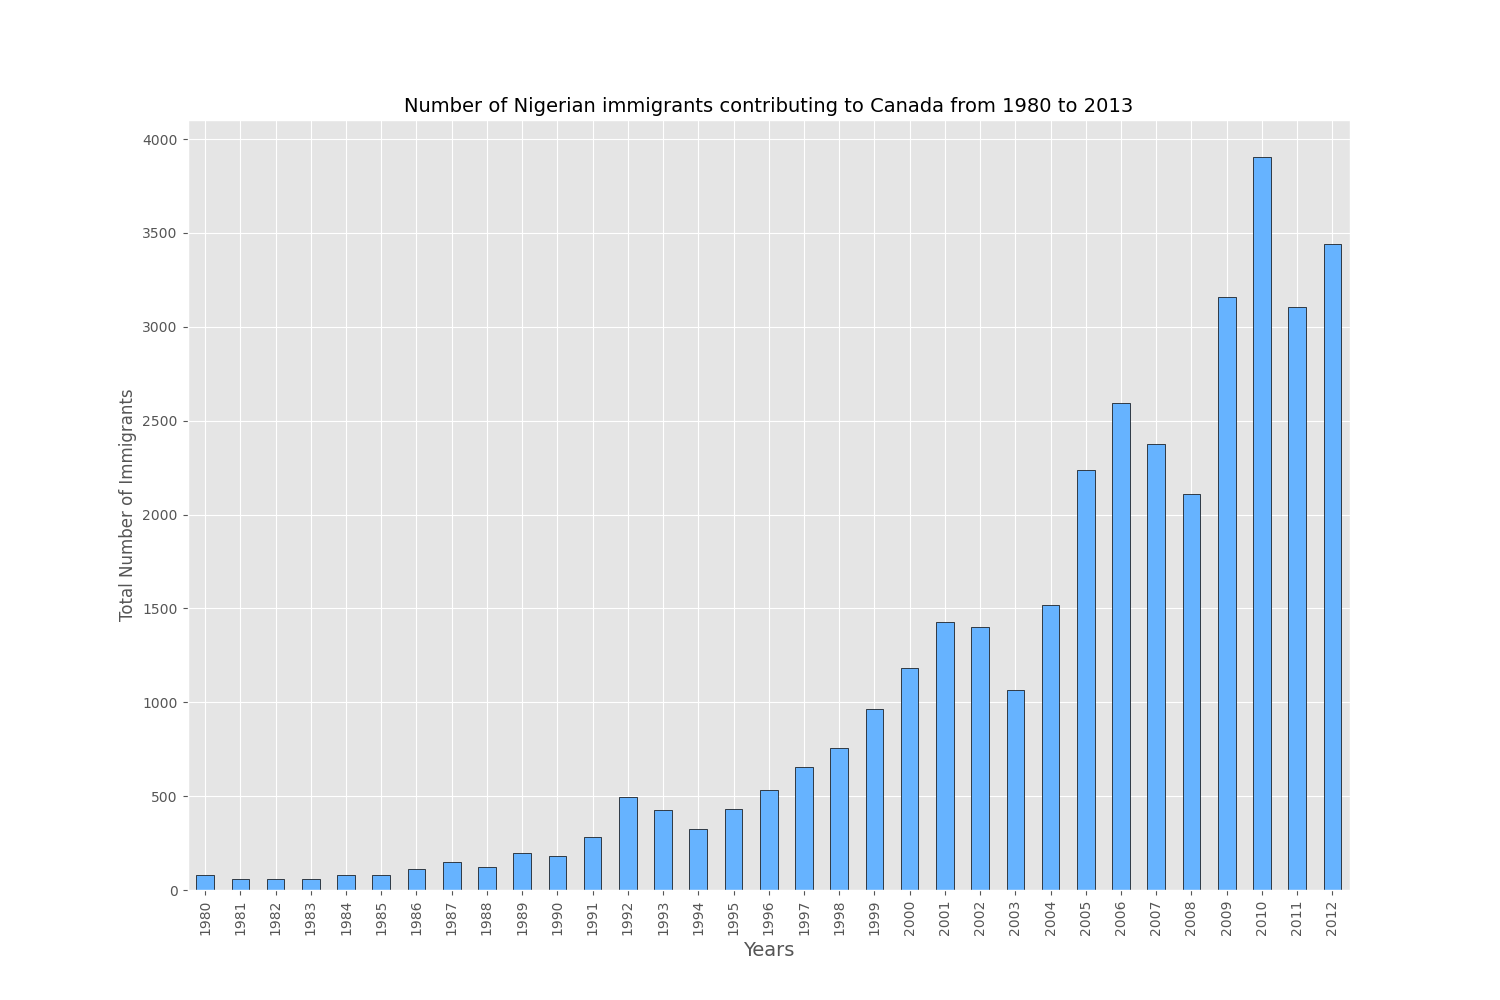

<Figure size 1500x1000 with 0 Axes>

In [62]:
df_Nigeria=df.loc['Nigeria',Years]
df_Nigeria.plot(kind='bar', figsize=(15, 10), rot=90, color='#66b3ff', edgecolor='black')
plt.title('Number of Nigerian immigrants contributing to Canada from 1980 to 2013', fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Total Number of Immigrants')
plt.show()

###
**6. Scatter plot for the total number of immigrants from 1980 to 2013**

In [34]:
df_tot_imm=pd.DataFrame(df[Years].sum(axis=0)) #to give total population per year
df_tot_imm.index = map(int, df_tot_imm.index) # change the years to int type to be used for regression
df_tot_imm.reset_index(inplace = True) # reset the index to put the years as columns in the df_tot_imm dataframe
df_tot_imm.columns = ['Years','Total immigrants'] #to rename the columns
df_tot_imm.head() # to see the first 5 columns 

,Years,Total immigrants
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


###
From these  values, a scatter plot can be made to visualize the yearly immigration trend from 1980 to 2013

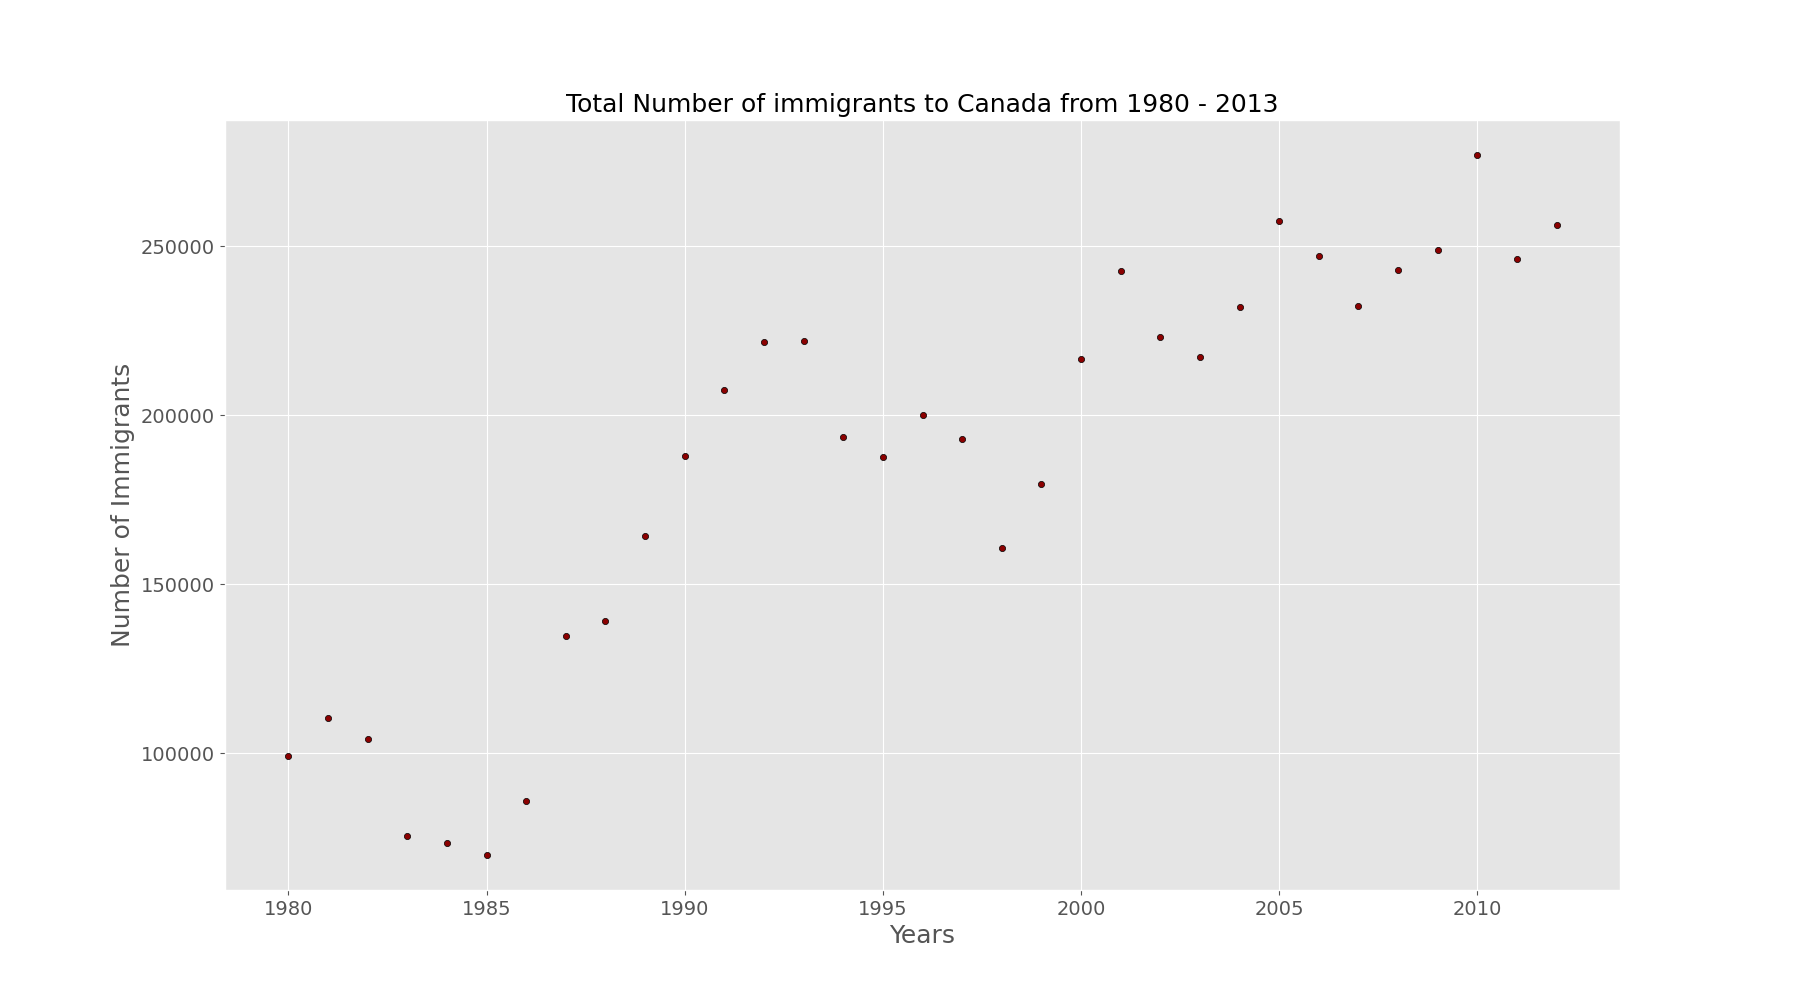

<Figure size 1800x1000 with 0 Axes>

In [35]:
df_tot_imm.plot(kind='scatter', x='Years', y='Total immigrants', figsize=(18, 10), color='darkred', edgecolor='black', fontsize=14)
plt.title('Total Number of immigrants to Canada from 1980 - 2013', fontsize=18)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of Immigrants', fontsize=18)
plt.show()

###
### Prediction with Line of Best fit
We can predict the number of Immigrants for any given year by fitting a line of best fit to the above scatter plot. This can be done by fitting the x and y values to a polynomial function of degree 1 in the form y = ax + b. 
Where 'y' equals number immigrants, 'x' equals the year, and b is the slope (or intercept). The polyfit function can be used to fit these x and y values in a numpy array as follows:

In [37]:
x = df_tot_imm['Years']      
y = df_tot_imm['Total immigrants']    
fit = np.polyfit(x, y, deg=1)
fit

array([ 5.69677707e+03, -1.11843544e+07])

###
For a polynomial of degree 1, we would have the slope and intercept in positions 0 and 1 respectively (recall y = ax + b). We can now modify the above scatter plot by adding in the line of best fit.

Number of Immigrants = 5697 * Year + -11184354


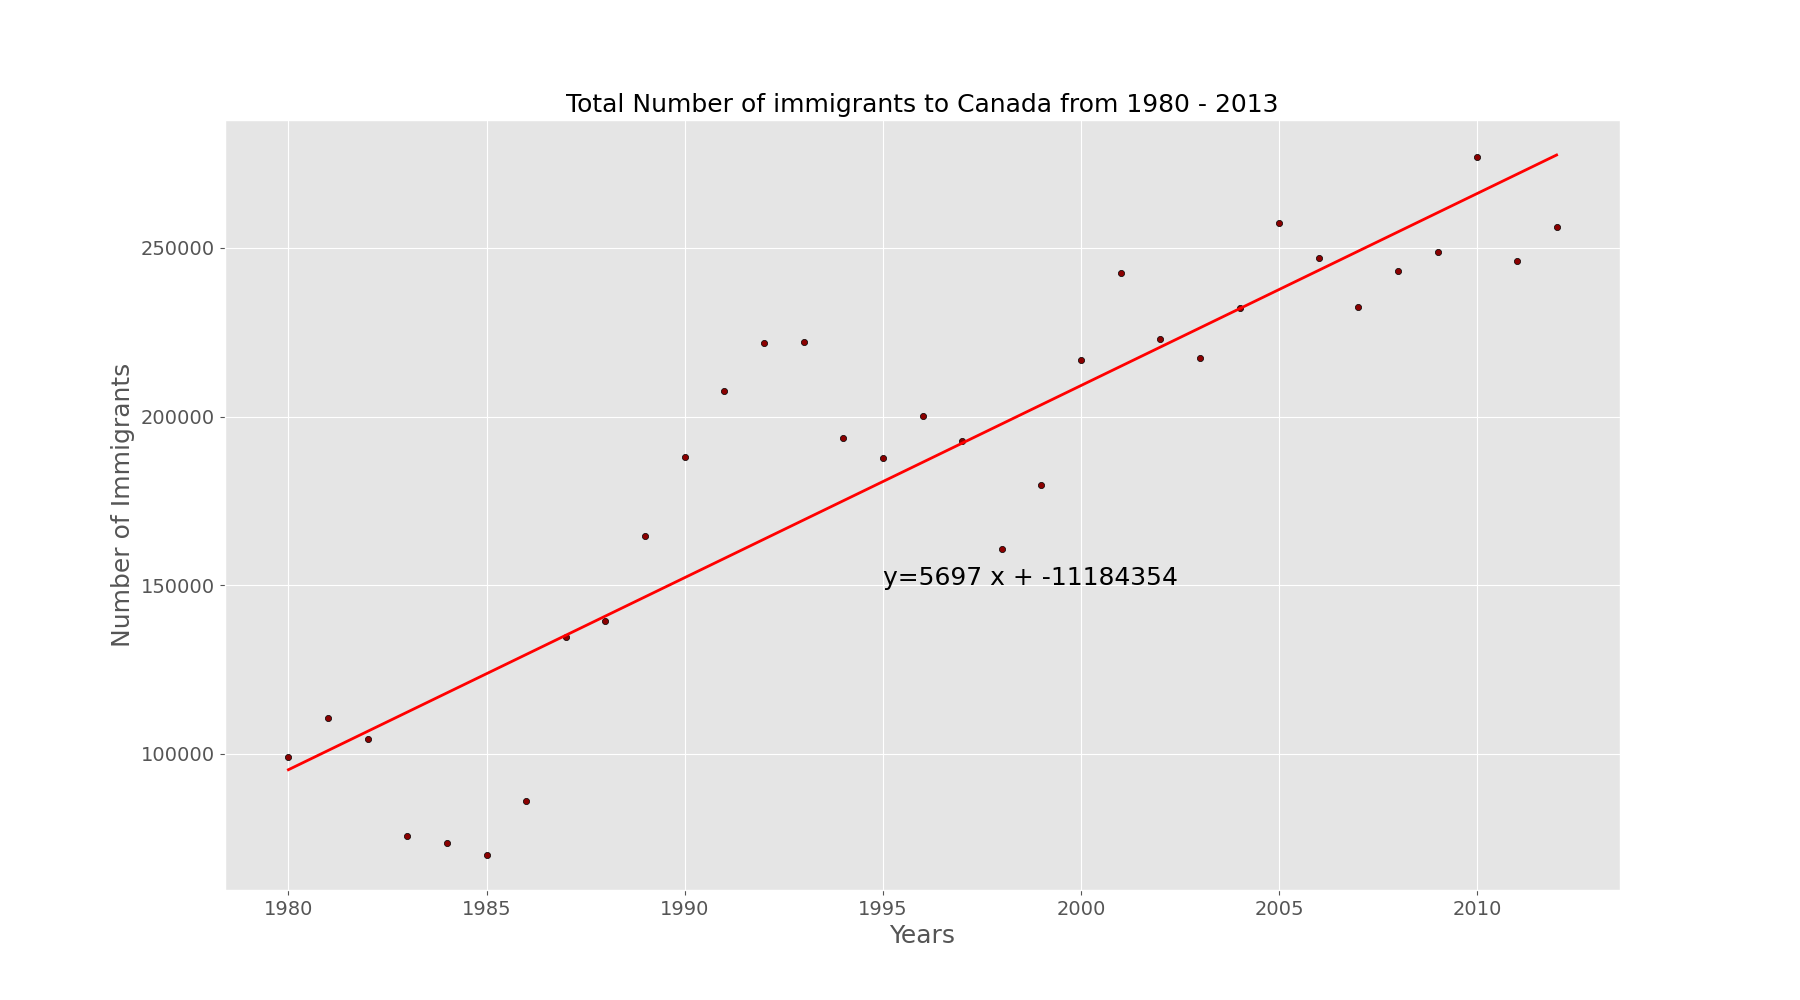

<Figure size 1800x1000 with 0 Axes>

In [38]:
df_tot_imm.plot(kind='scatter', x='Years', y='Total immigrants', figsize=(18, 10), color='darkred', edgecolor='black', fontsize=14)
plt.title('Total Number of immigrants to Canada from 1980 - 2013', fontsize=18)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of Immigrants', fontsize=18)

# To plot the line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red', linestyle='solid', linewidth=2) 
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), fontsize = 18, xy=(1995, 150000)) #xy gives the positioning of equation of best fit
print('Number of Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]))
plt.show()

###
### Number of Immigrants for 2014
The equation of best fit gotten from the above scatter plot can be used to predict the number of immigrants for 2014

Number of immigrants = 5697 * (2014) - 11184354

Number of immigrants = 289,404

###
### Insights 

- **Developing versus Developed regions:** Immigrants from developing regions were 73.3% compared to 26.7% from the developed regions. The reason for this difference is because immigrants from developing countries are more likely to migrate to countries with better standards of living, higher wages, and employment opportunities that may not exist in their countries of origin. 

- **Immigration Prediction for 2014:** The number of immigrants predicted for 2014 from the line of best fit is 289,404. According to Statistics Canada, 260,411 immigrants were accepted in the Canada in 2014. While the predicted value is higher, it is within 11% of the actual value [1]. 

- **Immigration by Continent:** Majority of immigrants are from Asia with a value of 51.8%, followed by Europe (22%) and Africa (9.7%).

- **Nigerian Immigrants:** Nigeria had a relatively stable economy in the early 1970's. However, due to Structural Adjustment Programs and recession starting in the early 1980's, many Nigerian professionals migrated to other countries because of their declining wages and working conditions [3]. Sadly, the economic situation has significantly declined over the years coupled with the state of insecurity, high employment rates, and insurgency in the Northern part of Nigeria which has caused increased emigration from Nigeria.

- **Immigration policy changes:** The scatter plot showing the number of immigrants to Canada shows a decrease around 1993 to 1997. This decrease is as a result of the ammendments to the Immigration Act in 1992 and 1995 which placed strict requirements for refugee family sponsorship and made it harder to migrate to Canada [2].

### 
### References

[1] Laurent Martel & Carol D'Aoust, "Report on the Demographic Situation in Canada Permanent and Temporary Immigration to Canada from 2012 to 2014". Statistics Canada, July 5, 2016. Online <https://www150.statcan.gc.ca/n1/pub/91-209-x/2016001/article/14615-eng.htm>

[2] Benjamin Dolin & Margaret Young, "Canada's Immigration Policy". Law and Government Division, October 2002. Online <https://publications.gc.ca/Collection-R/LoPBdP/BP/bp190-e.htm>

[3] Migrants and Refugees, "Country Profiles - Nigeria". Online <https://migrants-refugees.va/country-profile/nigeria/>